In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
folder = "/home/songhyunsik/kuiotbigdata/Python_Programming_Class/python/pythonData/data/"
loan_data = pd.read_csv(folder + "loan_data.csv.gz")
print(loan_data.head())
print(loan_data.info())

   Unnamed: 0       status  loan_amnt       term  annual_inc    dti  \
0           1  Charged Off       2500  60 months       30000   1.00   
1           2  Charged Off       5600  60 months       40000   5.55   
2           3  Charged Off       5375  60 months       15000  18.08   
3           4  Charged Off       9000  36 months       30000  10.08   
4           5  Charged Off      10000  36 months      100000   7.06   

   payment_inc_ratio  revol_bal  revol_util             purpose  ...  \
0            2.39320       1687         9.4                 car  ...   
1            4.57170       5210        32.6      small_business  ...   
2            9.71600       9279        36.5               other  ...   
3           12.21520      10452        91.7  debt_consolidation  ...   
4            3.90888      11997        55.5               other  ...   

  delinq_2yrs_zero  pub_rec_zero  open_acc  grade  outcome emp_length  \
0                1             1         3    4.8  default         

In [4]:
predictors = [
    "loan_amnt",
    "term",
    "annual_inc",
    "dti",
    "payment_inc_ratio",
    "revol_bal",
    "revol_util",
    "purpose",
    "delinq_2yrs_zero",
    "pub_rec_zero",
    "open_acc",
    "grade",
    "emp_length",
    "purpose_",
    "home_",
    "emp_len_",
    "borrower_score",
]
outcome = "outcome"

X = pd.get_dummies(loan_data[predictors], drop_first=True, dtype=int)
y = loan_data[outcome]

In [5]:
rf_all = RandomForestClassifier(n_estimators=500, random_state=1)
rf_all.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [6]:
rf_all_entropy = RandomForestClassifier(n_estimators=500, criterion="entropy")
rf_all_entropy.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [7]:
scores = defaultdict(list)

# 교차 검증
for _ in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    rf_all.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf_all.predict(X_test))
    for column in X.columns:
        X_t = X_test.copy()
        X_t[column] = np.random.permutation(X_t[column].values)
        shuff_acc = accuracy_score(y_test, rf_all.predict(X_t))
        scores[column].append((acc - shuff_acc) / acc)

In [8]:
df = pd.DataFrame(
    {
        "feature": X.columns,
        "Accuracy Decrease": [np.mean(scores[column]) for column in X.columns],
        "Gini Decrease": rf_all.feature_importances_,
    }
)
df = df.sort_values("Accuracy Decrease")

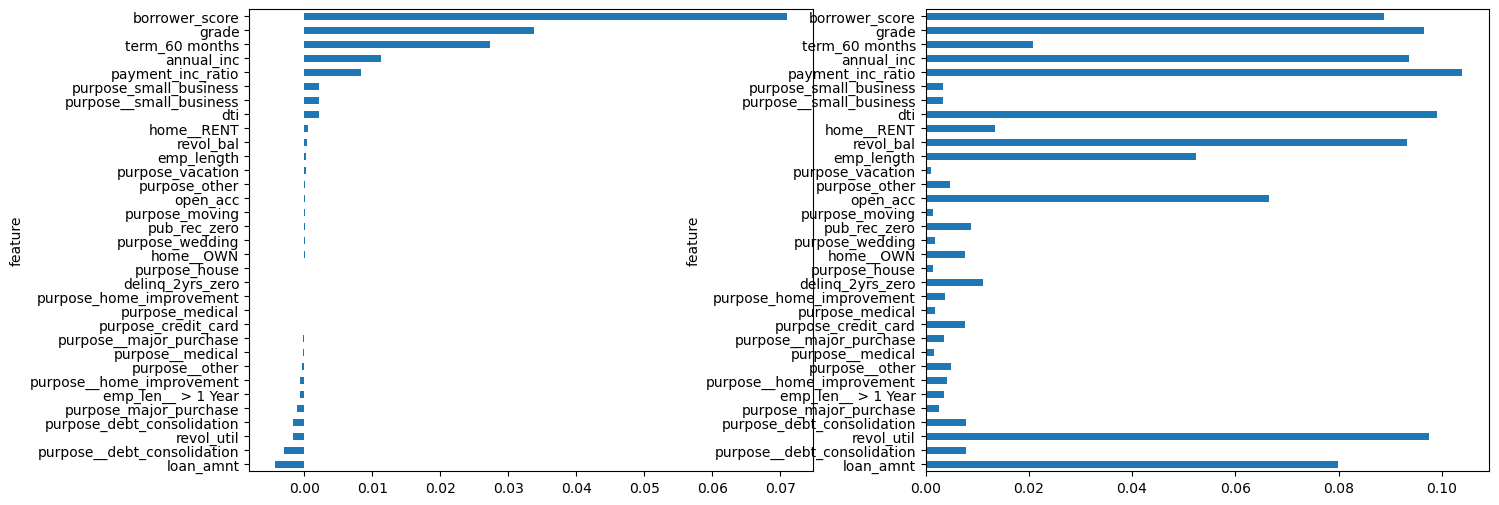

In [9]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
df.plot(kind="barh", x="feature", y="Accuracy Decrease", legend=False, ax=ax1)
df.plot(kind="barh", x="feature", y="Gini Decrease", legend=False, ax=ax2)
plt.show()